# 📊 Feature Engineering 사전 분석

**목적:**  
- 6개 파생 변수의 타당성 검증
- 데이터 분포 및 불균형 확인
- 금연 성공률과의 관계 분석
- 사용 가능 여부 최종 결정

**작성자:** vfxpedia  
**날짜:** 2025-10-13

---
## 📦 Cell 1: 환경 설정

In [1]:
# 라이브러리
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import os
import matplotlib
import matplotlib.font_manager as fm
import warnings
warnings.filterwarnings('ignore')

font_path = 'C:/Windows/Fonts/gulim.ttc'
font = fm.FontProperties(fname=font_path).get_name()
matplotlib.rc('font', family=font) #폰트 설정 변경
plt.rcParams['axes.unicode_minus']=False #마이너스 기호 깨질 때

# 그래프 스타일
sns.set_style('whitegrid')

# 판다스 옵션
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

print("✅ 환경 설정 완료!")

✅ 환경 설정 완료!


---
## 📊 Cell 2: 데이터 로드 및 기본 정보


In [2]:
# 데이터 로드
DATA_PATH = Path('../../../data/analy_data.csv')

df = pd.read_csv(DATA_PATH)

print("=" * 60)
print("📊 데이터 기본 정보")
print("=" * 60)
print(f"데이터 크기: {df.shape[0]:,} rows × {df.shape[1]} columns")
print(f"\n타겟 변수 (churn) 분포:")
print(df['churn'].value_counts())
print(f"\n금연 성공률: {df['churn'].mean() * 100:.2f}%")

# 담당 원본 변수 확인
target_cols = ['sob_01z1', 'soa_01z1', 'soa_06z2', 'soa_07z1', 'sod_02z3']
print(f"\n담당 변수 결측값:")
for col in target_cols:
    missing = df[col].isna().sum()
    pct = missing / len(df) * 100
    print(f"  {col}: {missing:,}개 ({pct:.1f}%)")


📊 데이터 기본 정보
데이터 크기: 89,822 rows × 210 columns

타겟 변수 (churn) 분포:
churn
1    49251
0    40571
Name: count, dtype: int64

금연 성공률: 54.83%

담당 변수 결측값:
  sob_01z1: 0개 (0.0%)
  soa_01z1: 0개 (0.0%)
  soa_06z2: 0개 (0.0%)
  soa_07z1: 0개 (0.0%)
  sod_02z3: 0개 (0.0%)


---
## 🔍 Cell 3: 원본 변수 5개 탐색

In [9]:
print("=" * 60)
print("🔍 원본 변수 분포 및 금연 성공률")
print("=" * 60)

# 1. sob_01z1 (교육수준)
print("\n1️⃣ sob_01z1 (교육수준)")
print("-" * 40)
print(df['sob_01z1'].value_counts().sort_index())
print(f"\n금연 성공률:")
print(df.groupby('sob_01z1')['churn'].agg(['count', 'mean']).round(3))

# 2. soa_01z1 (경제활동)
print("\n2️⃣ soa_01z1 (경제활동)")
print("-" * 40)
print(df['soa_01z1'].value_counts().sort_index())
print(f"\n금연 성공률:")
print(df.groupby('soa_01z1')['churn'].agg(['count', 'mean']).round(3))

# 3. soa_06z2 (직업분류)
print("\n3️⃣ soa_06z2 (직업분류)")
print("-" * 40)
print(df['soa_06z2'].value_counts().sort_index())
print(f"\n금연 성공률:")
print(df.groupby('soa_06z2')['churn'].agg(['count', 'mean']).round(3))

# 4. soa_07z1 (종사상지위)
print("\n4️⃣ soa_07z1 (종사상지위)")
print("-" * 40)
print(df['soa_07z1'].value_counts().sort_index())
print(f"\n금연 성공률:")
print(df.groupby('soa_07z1')['churn'].agg(['count', 'mean']).round(3))

# 5. sod_02z3 (혼인상태)
print("\n5️⃣ sod_02z3 (혼인상태)")
print("-" * 40)
print(df['sod_02z3'].value_counts().sort_index())
print(f"\n금연 성공률:")
print(df.groupby('sod_02z3')['churn'].agg(['count', 'mean']).round(3))

🔍 원본 변수 분포 및 금연 성공률

1️⃣ sob_01z1 (교육수준)
----------------------------------------
sob_01z1
1.0      1465
2.0        54
3.0      9897
4.0     10378
5.0     31369
6.0     11171
7.0     21721
8.0      3733
77.0       33
99.0        1
Name: count, dtype: int64

금연 성공률:
          count   mean
sob_01z1              
1.0        1465  0.694
2.0          54  0.778
3.0        9897  0.700
4.0       10378  0.631
5.0       31369  0.493
6.0       11171  0.458
7.0       21721  0.535
8.0        3733  0.673
77.0         33  0.636
99.0          1  0.000

2️⃣ soa_01z1 (경제활동)
----------------------------------------
soa_01z1
1.0    64823
2.0    24995
7.0        1
9.0        3
Name: count, dtype: int64

금연 성공률:
          count   mean
soa_01z1              
1.0       64823  0.510
2.0       24995  0.647
7.0           1  1.000
9.0           3  0.000

3️⃣ soa_06z2 (직업분류)
----------------------------------------
soa_06z2
1.0      2282
2.0      7773
3.0      8466
4.0      5800
5.0      4607
6.0      9651
7.0    

---
## 🎯 Feature 1: education_group

🎯 Feature 1: education_group 분석

📊 분포:
  0 (저학력): 1,519명 (1.7%)
  1 (중학력): 9,897명 (11.0%)
  2 (고학력): 78,406명 (87.3%)

📈 불균형 비율: 51.62:1

🎯 금연 성공률:
                   샘플수  금연성공률(%)
education_group                 
0.0               1519     69.65
1.0               9897     70.00
2.0              78406     52.63

✅ 결론:
  ❌ 불균형 51.62:1 → 위험
  ❌ 리샘플링 필요


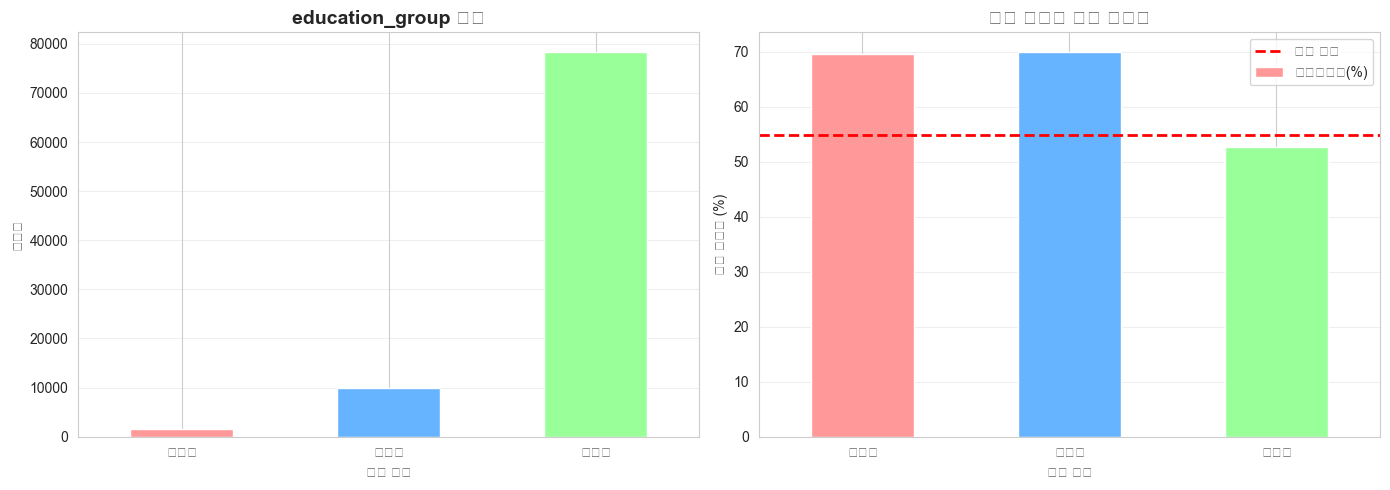

In [3]:
# Feature Engineering 함수
def feature_education_group(df_merge):
    """
    교육수준을 3그룹으로 분류
    - 0: 저학력 (무학/초졸/중졸)
    - 1: 중학력 (고졸)
    - 2: 고학력 (대졸 이상)
    """
    conditions = [
        df_merge['sob_01z1'] <= 2,
        df_merge['sob_01z1'] == 3,
        df_merge['sob_01z1'] >= 4
    ]
    choices = [0, 1, 2]
    df_merge['education_group'] = np.select(conditions, choices, default=np.nan)
    return df_merge

# Feature 생성
df = feature_education_group(df)

print("=" * 60)
print("🎯 Feature 1: education_group 분석")
print("=" * 60)

# 1. 분포 확인
print("\n📊 분포:")
dist = df['education_group'].value_counts().sort_index()
total = dist.sum()
for idx, count in dist.items():
    label = "저학력" if idx == 0 else "중학력" if idx == 1 else "고학력"
    pct = count / total * 100
    print(f"  {int(idx)} ({label}): {count:,}명 ({pct:.1f}%)")

# 2. 불균형 비율
max_count = dist.max()
min_count = dist.min()
imbalance_ratio = max_count / min_count
print(f"\n📈 불균형 비율: {imbalance_ratio:.2f}:1")

# 3. 금연 성공률
print("\n🎯 금연 성공률:")
churn_by_edu = df.groupby('education_group')['churn'].agg(['count', 'mean'])
churn_by_edu['mean'] = churn_by_edu['mean'] * 100
churn_by_edu.columns = ['샘플수', '금연성공률(%)']
print(churn_by_edu.round(2))

# 4. 판단
print("\n✅ 결론:")
if imbalance_ratio < 3:
    print(f"  ✅ 불균형 {imbalance_ratio:.2f}:1 → 양호")
    print("  ✅ 사용 가능!")
elif imbalance_ratio < 10:
    print(f"  ⚠️  불균형 {imbalance_ratio:.2f}:1 → 주의 필요")
    print("  ⚠️  class_weight 조정 권장")
else:
    print(f"  ❌ 불균형 {imbalance_ratio:.2f}:1 → 위험")
    print("  ❌ 리샘플링 필요")

# 5. 시각화
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# 분포
dist.plot(kind='bar', ax=axes[0], color=['#ff9999', '#66b3ff', '#99ff99'])
axes[0].set_title('education_group 분포', fontsize=14, fontweight='bold')
axes[0].set_xlabel('교육 그룹')
axes[0].set_ylabel('인원수')
axes[0].set_xticklabels(['저학력', '중학력', '고학력'], rotation=0)
axes[0].grid(axis='y', alpha=0.3)

# 금연 성공률
churn_by_edu['금연성공률(%)'].plot(kind='bar', ax=axes[1], color=['#ff9999', '#66b3ff', '#99ff99'])
axes[1].set_title('교육 그룹별 금연 성공률', fontsize=14, fontweight='bold')
axes[1].set_xlabel('교육 그룹')
axes[1].set_ylabel('금연 성공률 (%)')
axes[1].set_xticklabels(['저학력', '중학력', '고학력'], rotation=0)
axes[1].axhline(df['churn'].mean()*100, color='red', linestyle='--', linewidth=2, label='전체 평균')
axes[1].legend()
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

---
## 🎯 Feature 2: is_economically_active

🎯 Feature 2: is_economically_active 분석

📊 분포:
  0 (비경제활동): 24,999명 (27.8%)
  1 (경제활동): 64,823명 (72.2%)

📈 불균형 비율: 2.59:1

🎯 금연 성공률:
                          샘플수  금연성공률(%)
is_economically_active                 
0                       24999     64.74
1                       64823     51.01

💡 성공률 차이: -13.73%p (경제활동 - 비경제활동)

✅ 결론:
  ✅ 불균형 2.59:1 → 양호
  ✅ 금연 성공률 차이 13.7%p → 유의미한 Feature!


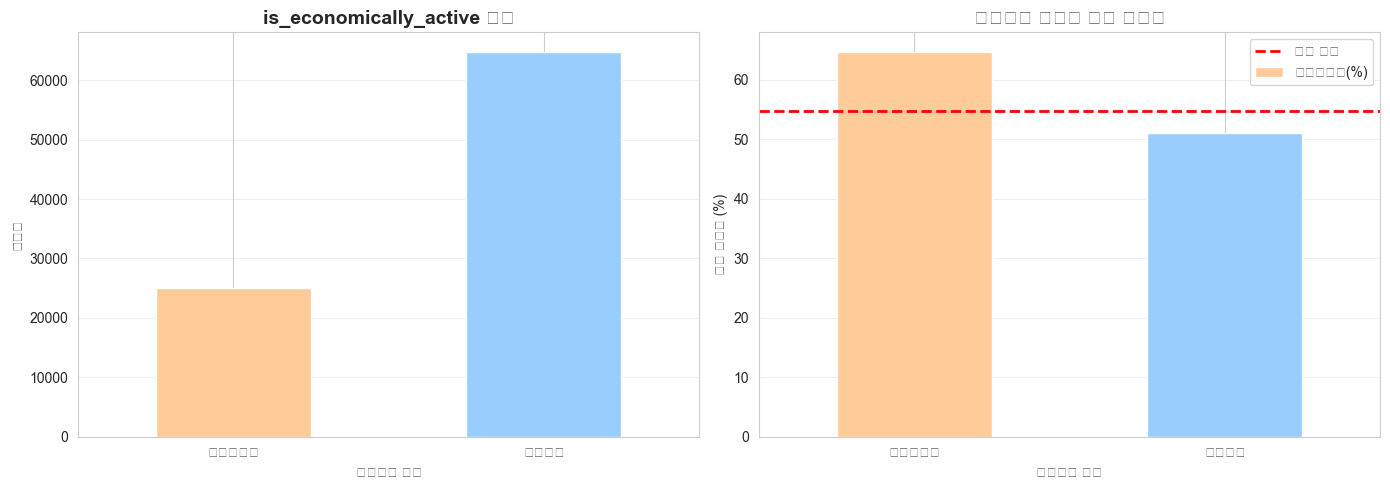

In [4]:
# Feature Engineering 함수
def feature_is_economically_active(df_merge):
    """
    경제활동 여부 (0/1)
    - 1: 경제활동 (취업자)
    - 0: 비경제활동
    """
    df_merge['is_economically_active'] = np.where(
        df_merge['soa_01z1'] == 1, 1, 0
    )
    return df_merge

# Feature 생성
df = feature_is_economically_active(df)

print("=" * 60)
print("🎯 Feature 2: is_economically_active 분석")
print("=" * 60)

# 1. 분포 확인
print("\n📊 분포:")
dist = df['is_economically_active'].value_counts().sort_index()
total = dist.sum()
for idx, count in dist.items():
    label = "비경제활동" if idx == 0 else "경제활동"
    pct = count / total * 100
    print(f"  {int(idx)} ({label}): {count:,}명 ({pct:.1f}%)")

# 2. 불균형 비율
max_count = dist.max()
min_count = dist.min()
imbalance_ratio = max_count / min_count
print(f"\n📈 불균형 비율: {imbalance_ratio:.2f}:1")

# 3. 금연 성공률
print("\n🎯 금연 성공률:")
churn_by_eco = df.groupby('is_economically_active')['churn'].agg(['count', 'mean'])
churn_by_eco['mean'] = churn_by_eco['mean'] * 100
churn_by_eco.columns = ['샘플수', '금연성공률(%)']
print(churn_by_eco.round(2))

# 성공률 차이
diff = churn_by_eco.loc[1, '금연성공률(%)'] - churn_by_eco.loc[0, '금연성공률(%)']
print(f"\n💡 성공률 차이: {diff:.2f}%p (경제활동 - 비경제활동)")

# 4. 판단
print("\n✅ 결론:")
if imbalance_ratio < 3:
    print(f"  ✅ 불균형 {imbalance_ratio:.2f}:1 → 양호")
elif imbalance_ratio < 10:
    print(f"  ⚠️  불균형 {imbalance_ratio:.2f}:1 → 주의")
else:
    print(f"  ❌ 불균형 {imbalance_ratio:.2f}:1 → 위험")

if abs(diff) > 5:
    print(f"  ✅ 금연 성공률 차이 {abs(diff):.1f}%p → 유의미한 Feature!")
else:
    print(f"  ⚠️  금연 성공률 차이 {abs(diff):.1f}%p → 영향력 작음")

# 5. 시각화
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# 분포
dist.plot(kind='bar', ax=axes[0], color=['#ffcc99', '#99ccff'])
axes[0].set_title('is_economically_active 분포', fontsize=14, fontweight='bold')
axes[0].set_xlabel('경제활동 여부')
axes[0].set_ylabel('인원수')
axes[0].set_xticklabels(['비경제활동', '경제활동'], rotation=0)
axes[0].grid(axis='y', alpha=0.3)

# 금연 성공률
churn_by_eco['금연성공률(%)'].plot(kind='bar', ax=axes[1], color=['#ffcc99', '#99ccff'])
axes[1].set_title('경제활동 여부별 금연 성공률', fontsize=14, fontweight='bold')
axes[1].set_xlabel('경제활동 여부')
axes[1].set_ylabel('금연 성공률 (%)')
axes[1].set_xticklabels(['비경제활동', '경제활동'], rotation=0)
axes[1].axhline(df['churn'].mean()*100, color='red', linestyle='--', linewidth=2, label='전체 평균')
axes[1].legend()
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

---
## 🎯 Feature 3: occupation_type

🎯 Feature 3: occupation_type 분석

📊 분포:
  블루칼라: 45,889명 (51.1%)
  비경제활동: 24,995명 (27.8%)
  화이트칼라: 18,521명 (20.6%)
  기타: 417명 (0.5%)

📈 불균형 비율: 110.05:1

🎯 금연 성공률:
                   샘플수  금연성공률(%)
occupation_type                 
비경제활동            24995     64.74
화이트칼라            18521     53.17
블루칼라             45889     50.25
기타                 417     39.09

✅ 결론:
  ❌ 불균형 110.05:1 → 위험


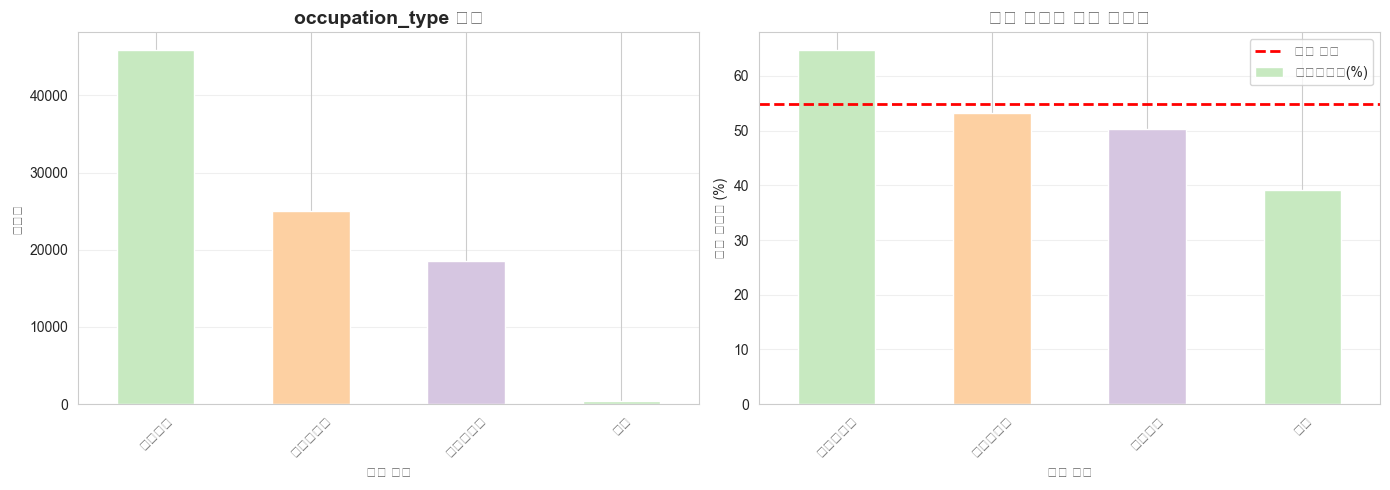

In [ ]:
# Feature Engineering 함수
def feature_occupation_type(df_merge):
    """
    직업을 3가지 유형으로 분류
    - 화이트칼라: 관리자, 전문가, 사무직
    - 블루칼라: 서비스, 판매, 농림어업, 기능원, 장치조작, 단순노무
    - 비경제활동: 미취업자
    """
    conditions = [
        df_merge['soa_06z2'].isin([1, 2, 3]),
        df_merge['soa_06z2'].isin([4, 5, 6, 7, 8, 9]),
        df_merge['soa_06z2'] == 88
    ]
    choices = ['화이트칼라', '블루칼라', '비경제활동']
    df_merge['occupation_type'] = np.select(conditions, choices, default='기타')
    return df_merge

# Feature 생성
df = feature_occupation_type(df)

print("=" * 60)
print("🎯 Feature 3: occupation_type 분석")
print("=" * 60)

# 1. 분포 확인
print("\n📊 분포:")
dist = df['occupation_type'].value_counts()
total = dist.sum()
for label, count in dist.items():
    pct = count / total * 100
    print(f"  {label}: {count:,}명 ({pct:.1f}%)")

# 2. 불균형 비율
max_count = dist.max()
min_count = dist.min()
imbalance_ratio = max_count / min_count
print(f"\n📈 불균형 비율: {imbalance_ratio:.2f}:1")

# 3. 금연 성공률
print("\n🎯 금연 성공률:")
churn_by_occ = df.groupby('occupation_type')['churn'].agg(['count', 'mean'])
churn_by_occ['mean'] = churn_by_occ['mean'] * 100
churn_by_occ.columns = ['샘플수', '금연성공률(%)']
churn_by_occ = churn_by_occ.sort_values('금연성공률(%)', ascending=False)
print(churn_by_occ.round(2))

# 4. 판단
print("\n✅ 결론:")
if imbalance_ratio < 3:
    print(f"  ✅ 불균형 {imbalance_ratio:.2f}:1 → 양호")
elif imbalance_ratio < 10:
    print(f"  ⚠️  불균형 {imbalance_ratio:.2f}:1 → 주의")
else:
    print(f"  ❌ 불균형 {imbalance_ratio:.2f}:1 → 위험")

# 5. 시각화
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# 카테고리별 색상 매핑
color_map = {
    '화이트칼라': '#c7e9c0',
    '블루칼라': '#fdd0a2',
    '비경제활동': '#d6c6e1',
    '기타': '#cccccc'
}

# 분포
colors_dist = [color_map.get(x, '#cccccc') for x in dist.index]
dist.plot(kind='bar', ax=axes[0], color=colors_dist)
axes[0].set_title('occupation_type 분포', fontsize=14, fontweight='bold')
axes[0].set_xlabel('직업 유형')
axes[0].set_ylabel('인원수')
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(axis='y', alpha=0.3)

# 금연 성공률
colors_churn = [color_map.get(x, '#cccccc') for x in churn_by_occ.index]
churn_by_occ['금연성공률(%)'].plot(kind='bar', ax=axes[1], color=colors_churn)
axes[1].set_title('직업 유형별 금연 성공률', fontsize=14, fontweight='bold')
axes[1].set_xlabel('직업 유형')
axes[1].set_ylabel('금연 성공률 (%)')
axes[1].tick_params(axis='x', rotation=45)
axes[1].axhline(df['churn'].mean()*100, color='red', linestyle='--', linewidth=2, label='전체 평균')
axes[1].legend()
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

---
## 🎯 Feature 4: is_employee

🎯 Feature 4: is_employee 분석

📊 분포:
  0 (비임금근로자): 25,008명 (27.8%)
  1 (임금근로자): 64,814명 (72.2%)

📈 불균형 비율: 2.59:1

🎯 금연 성공률:
               샘플수  금연성공률(%)
is_employee                 
0            25008     64.73
1            64814     51.01

💡 성공률 차이: -13.71%p (임금근로자 - 비임금근로자)

✅ 결론:
  ✅ 불균형 2.59:1 → 양호
  ✅ 금연 성공률 차이 13.7%p → 유의미한 Feature!


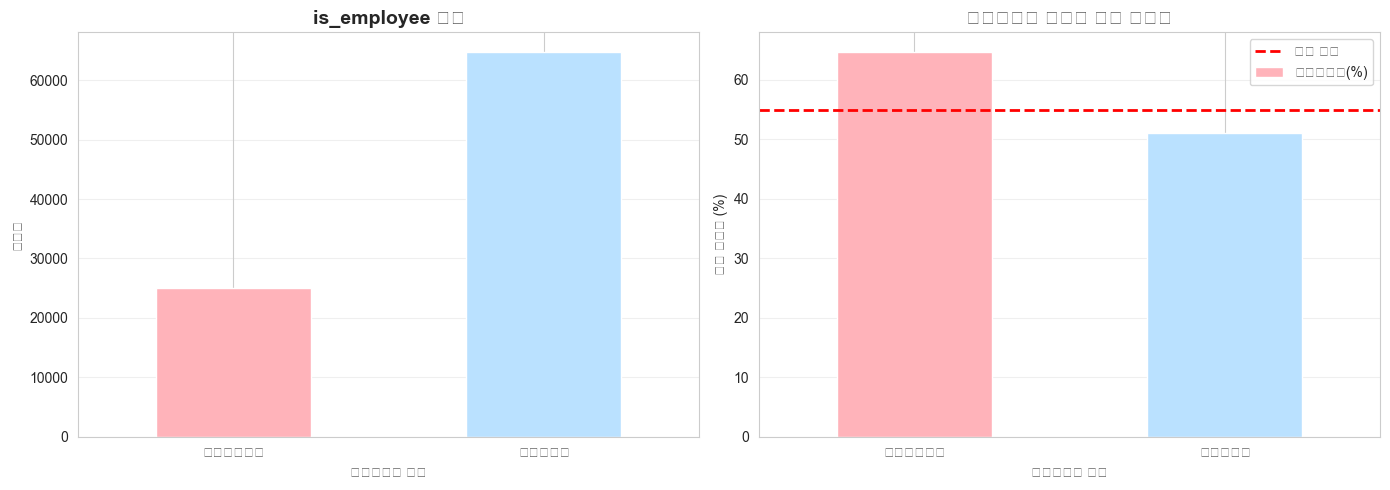

In [8]:
# Feature Engineering 함수
def feature_is_employee(df_merge):
    """
    임금근로자 여부 (0/1)
    - 1: 임금근로자 (상용직, 임시직, 일용직)
    - 0: 자영업자, 고용주, 무급가족종사자
    """
    df_merge['is_employee'] = np.where(
        df_merge['soa_07z1'].isin([1, 2, 3]), 1, 0
    )
    return df_merge

# Feature 생성
df = feature_is_employee(df)

print("=" * 60)
print("🎯 Feature 4: is_employee 분석")
print("=" * 60)

# 1. 분포 확인
print("\n📊 분포:")
dist = df['is_employee'].value_counts().sort_index()
total = dist.sum()
for idx, count in dist.items():
    label = "비임금근로자" if idx == 0 else "임금근로자"
    pct = count / total * 100
    print(f"  {int(idx)} ({label}): {count:,}명 ({pct:.1f}%)")

# 2. 불균형 비율
max_count = dist.max()
min_count = dist.min()
imbalance_ratio = max_count / min_count
print(f"\n📈 불균형 비율: {imbalance_ratio:.2f}:1")

# 3. 금연 성공률
print("\n🎯 금연 성공률:")
churn_by_emp = df.groupby('is_employee')['churn'].agg(['count', 'mean'])
churn_by_emp['mean'] = churn_by_emp['mean'] * 100
churn_by_emp.columns = ['샘플수', '금연성공률(%)']
print(churn_by_emp.round(2))

# 성공률 차이
diff = churn_by_emp.loc[1, '금연성공률(%)'] - churn_by_emp.loc[0, '금연성공률(%)']
print(f"\n💡 성공률 차이: {diff:.2f}%p (임금근로자 - 비임금근로자)")

# 4. 판단
print("\n✅ 결론:")
if imbalance_ratio < 3:
    print(f"  ✅ 불균형 {imbalance_ratio:.2f}:1 → 양호")
elif imbalance_ratio < 10:
    print(f"  ⚠️  불균형 {imbalance_ratio:.2f}:1 → 주의")
else:
    print(f"  ❌ 불균형 {imbalance_ratio:.2f}:1 → 위험")

if abs(diff) > 5:
    print(f"  ✅ 금연 성공률 차이 {abs(diff):.1f}%p → 유의미한 Feature!")
else:
    print(f"  ⚠️  금연 성공률 차이 {abs(diff):.1f}%p → 영향력 작음")

# 5. 시각화
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# 분포
dist.plot(kind='bar', ax=axes[0], color=['#ffb3ba', '#bae1ff'])
axes[0].set_title('is_employee 분포', fontsize=14, fontweight='bold')
axes[0].set_xlabel('임금근로자 여부')
axes[0].set_ylabel('인원수')
axes[0].set_xticklabels(['비임금근로자', '임금근로자'], rotation=0)
axes[0].grid(axis='y', alpha=0.3)

# 금연 성공률
churn_by_emp['금연성공률(%)'].plot(kind='bar', ax=axes[1], color=['#ffb3ba', '#bae1ff'])
axes[1].set_title('임금근로자 여부별 금연 성공률', fontsize=14, fontweight='bold')
axes[1].set_xlabel('임금근로자 여부')
axes[1].set_ylabel('금연 성공률 (%)')
axes[1].set_xticklabels(['비임금근로자', '임금근로자'], rotation=0)
axes[1].axhline(df['churn'].mean()*100, color='red', linestyle='--', linewidth=2, label='전체 평균')
axes[1].legend()
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()


---
## 🎯 Feature 5: is_married


🎯 Feature 5: is_married 분석

📊 분포:
  0 (배우자 없음): 30,214명 (33.6%)
  1 (배우자 있음): 59,608명 (66.4%)

📈 불균형 비율: 1.97:1

🎯 금연 성공률:
              샘플수  금연성공률(%)
is_married                 
0           30214     41.16
1           59608     61.76

💡 성공률 차이: 20.61%p (배우자 있음 - 배우자 없음)

✅ 결론:
  ✅ 불균형 1.97:1 → 양호
  ✅ 금연 성공률 차이 20.6%p → 유의미한 Feature!


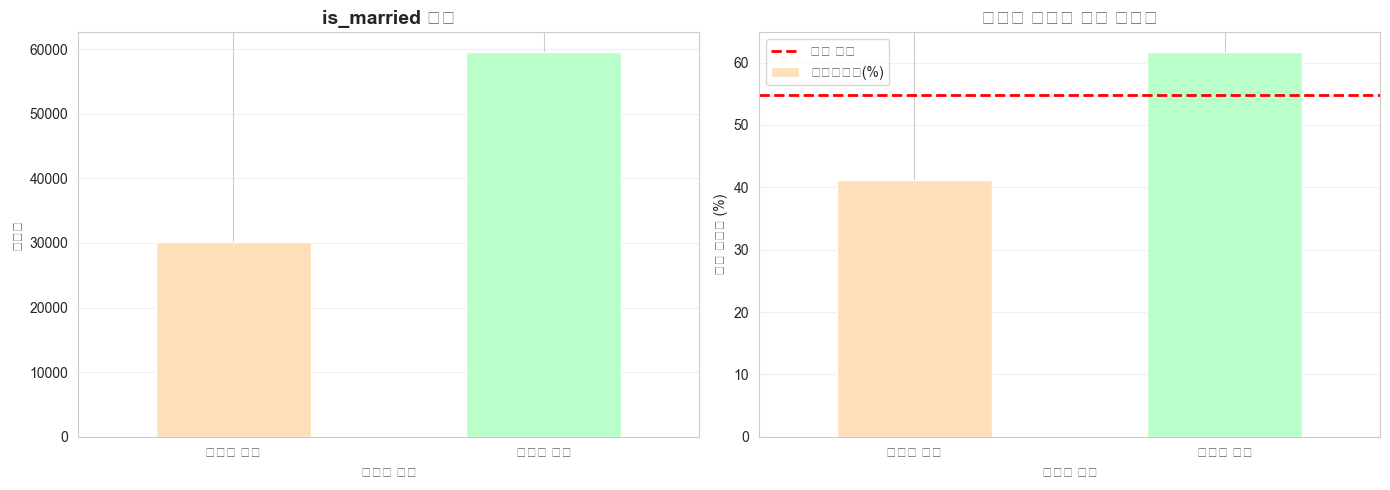

In [9]:
# Feature Engineering 함수
def feature_is_married(df_merge):
    """
    배우자 있음 (0/1)
    - 1: 배우자 있음 (유배우)
    - 0: 배우자 없음
    """
    df_merge['is_married'] = np.where(
        df_merge['sod_02z3'] == 1, 1, 0
    )
    return df_merge

# Feature 생성
df = feature_is_married(df)

print("=" * 60)
print("🎯 Feature 5: is_married 분석")
print("=" * 60)

# 1. 분포 확인
print("\n📊 분포:")
dist = df['is_married'].value_counts().sort_index()
total = dist.sum()
for idx, count in dist.items():
    label = "배우자 없음" if idx == 0 else "배우자 있음"
    pct = count / total * 100
    print(f"  {int(idx)} ({label}): {count:,}명 ({pct:.1f}%)")

# 2. 불균형 비율
max_count = dist.max()
min_count = dist.min()
imbalance_ratio = max_count / min_count
print(f"\n📈 불균형 비율: {imbalance_ratio:.2f}:1")

# 3. 금연 성공률
print("\n🎯 금연 성공률:")
churn_by_married = df.groupby('is_married')['churn'].agg(['count', 'mean'])
churn_by_married['mean'] = churn_by_married['mean'] * 100
churn_by_married.columns = ['샘플수', '금연성공률(%)']
print(churn_by_married.round(2))

# 성공률 차이
diff = churn_by_married.loc[1, '금연성공률(%)'] - churn_by_married.loc[0, '금연성공률(%)']
print(f"\n💡 성공률 차이: {diff:.2f}%p (배우자 있음 - 배우자 없음)")

# 4. 판단
print("\n✅ 결론:")
if imbalance_ratio < 3:
    print(f"  ✅ 불균형 {imbalance_ratio:.2f}:1 → 양호")
elif imbalance_ratio < 10:
    print(f"  ⚠️  불균형 {imbalance_ratio:.2f}:1 → 주의")
else:
    print(f"  ❌ 불균형 {imbalance_ratio:.2f}:1 → 위험")

if abs(diff) > 5:
    print(f"  ✅ 금연 성공률 차이 {abs(diff):.1f}%p → 유의미한 Feature!")
else:
    print(f"  ⚠️  금연 성공률 차이 {abs(diff):.1f}%p → 영향력 작음")

# 5. 시각화
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# 분포
dist.plot(kind='bar', ax=axes[0], color=['#ffdfba', '#baffc9'])
axes[0].set_title('is_married 분포', fontsize=14, fontweight='bold')
axes[0].set_xlabel('배우자 유무')
axes[0].set_ylabel('인원수')
axes[0].set_xticklabels(['배우자 없음', '배우자 있음'], rotation=0)
axes[0].grid(axis='y', alpha=0.3)

# 금연 성공률
churn_by_married['금연성공률(%)'].plot(kind='bar', ax=axes[1], color=['#ffdfba', '#baffc9'])
axes[1].set_title('배우자 유무별 금연 성공률', fontsize=14, fontweight='bold')
axes[1].set_xlabel('배우자 유무')
axes[1].set_ylabel('금연 성공률 (%)')
axes[1].set_xticklabels(['배우자 없음', '배우자 있음'], rotation=0)
axes[1].axhline(df['churn'].mean()*100, color='red', linestyle='--', linewidth=2, label='전체 평균')
axes[1].legend()
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()


---
## 🎯 Feature 6: marital_stability


In [ ]:
# Feature Engineering 함수
def feature_marital_stability(df_merge):
    """
    혼인 상태를 안정성 기준으로 분류
    - 안정: 유배우
    - 미혼: 미혼
    - 불안정: 사별, 이혼, 별거
    """
    conditions = [
        df_merge['sod_02z3'] == 1,                # 유배우
        df_merge['sod_02z3'] == 2,                # 미혼
        df_merge['sod_02z3'].isin([3, 4, 5])      # 사별, 이혼, 별거
    ]
    choices = ['안정', '미혼', '불안정']
    df_merge['marital_stability'] = np.select(conditions, choices, default=np.nan)
    return df_merge

# Feature 생성
df = feature_marital_stability(df)

print("=" * 60)
print("🎯 Feature 6: marital_stability 분석")
print("=" * 60)

# 1. 분포 확인
print("\n📊 분포:")
dist = df['marital_stability'].value_counts()
total = dist.sum()
for label, count in dist.items():
    pct = count / total * 100
    print(f"  {label}: {count:,}명 ({pct:.1f}%)")

# 2. 불균형 비율
max_count = dist.max()
min_count = dist.min()
imbalance_ratio = max_count / min_count
print(f"\n📈 불균형 비율: {imbalance_ratio:.2f}:1")

# 3. 금연 성공률
print("\n🎯 금연 성공률:")
churn_by_marital = df.groupby('marital_stability')['churn'].agg(['count', 'mean'])
churn_by_marital['mean'] = churn_by_marital['mean'] * 100
churn_by_marital.columns = ['샘플수', '금연성공률(%)']
churn_by_marital = churn_by_marital.sort_values('금연성공률(%)', ascending=False)
print(churn_by_marital.round(2))

# 4. 판단
print("\n✅ 결론:")
if imbalance_ratio < 3:
    print(f"  ✅ 불균형 {imbalance_ratio:.2f}:1 → 양호")
elif imbalance_ratio < 10:
    print(f"  ⚠️  불균형 {imbalance_ratio:.2f}:1 → 주의")
else:
    print(f"  ❌ 불균형 {imbalance_ratio:.2f}:1 → 위험")

# 5. 시각화
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# 카테고리별 색상 매핑
color_map = {
    '안정': '#d5f4e6',
    '미혼': '#fff3cd',
    '불안정': '#f8d7da'
}

# 분포
colors_dist = [color_map.get(x, '#cccccc') for x in dist.index]
dist.plot(kind='bar', ax=axes[0], color=colors_dist)
axes[0].set_title('marital_stability 분포', fontsize=14, fontweight='bold')
axes[0].set_xlabel('혼인 안정성')
axes[0].set_ylabel('인원수')
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(axis='y', alpha=0.3)

# 금연 성공률
colors_churn = [color_map.get(x, '#cccccc') for x in churn_by_marital.index]
churn_by_marital['금연성공률(%)'].plot(kind='bar', ax=axes[1], color=colors_churn)
axes[1].set_title('혼인 안정성별 금연 성공률', fontsize=14, fontweight='bold')
axes[1].set_xlabel('혼인 안정성')
axes[1].set_ylabel('금연 성공률 (%)')
axes[1].tick_params(axis='x', rotation=45)
axes[1].axhline(df['churn'].mean()*100, color='red', linestyle='--', linewidth=2, label='전체 평균')
axes[1].legend()
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()


TypeError: Choicelist and default value do not have a common dtype: The DType <class 'numpy.dtypes._PyFloatDType'> could not be promoted by <class 'numpy.dtypes.StrDType'>. This means that no common DType exists for the given inputs. For example they cannot be stored in a single array unless the dtype is `object`. The full list of DTypes is: (<class 'numpy.dtypes.StrDType'>, <class 'numpy.dtypes.StrDType'>, <class 'numpy.dtypes.StrDType'>, <class 'numpy.dtypes._PyFloatDType'>)

---
## 📈 Cell 10: 종합 분석 - 불균형 요약

In [6]:
print("=" * 60)
print("📈 6개 Feature 불균형 종합 분석")
print("=" * 60)

# 각 Feature의 불균형 비율 계산
features = [
    'education_group',
    'is_economically_active',
    'occupation_type',
    'is_employee',
    'is_married',
    'marital_stability'
]

imbalance_summary = []

for feature in features:
    dist = df[feature].value_counts()
    max_count = dist.max()
    min_count = dist.min()
    ratio = max_count / min_count
    
    # 판정
    if ratio < 3:
        status = "✅ 양호"
    elif ratio < 10:
        status = "⚠️  주의"
    else:
        status = "❌ 위험"
    
    imbalance_summary.append({
        'Feature': feature,
        '불균형_비율': f"{ratio:.2f}:1",
        '상태': status
    })

summary_df = pd.DataFrame(imbalance_summary)
print(summary_df.to_string(index=False))

print("\n" + "=" * 60)
print("🎯 최종 판단")
print("=" * 60)

good = summary_df[summary_df['상태'] == '✅ 양호'].shape[0]
warning = summary_df[summary_df['상태'] == '⚠️  주의'].shape[0]
danger = summary_df[summary_df['상태'] == '❌ 위험'].shape[0]

print(f"✅ 양호: {good}개")
print(f"⚠️  주의: {warning}개")
print(f"❌ 위험: {danger}개")

if danger == 0:
    print("\n✅ 모든 Feature가 사용 가능 수준입니다!")
elif danger <= 2:
    print("\n⚠️  일부 Feature는 리샘플링 또는 가중치 조정이 필요합니다.")
else:
    print("\n❌ Feature 재설계를 권장합니다.")

📈 6개 Feature 불균형 종합 분석


KeyError: 'is_employee'

---
## 🧩 Cell 11: 2-way 조합 패턴 미리보기

In [ ]:
print("=" * 60)
print("🧩 2-way 조합 패턴: 교육 × 경제활동")
print("=" * 60)

# 교차 집계
crosstab = pd.crosstab(
    [df['education_group'], df['is_economically_active']],
    df['churn']
)

# 금연 성공률 계산
crosstab['금연성공률(%)'] = crosstab[1] / (crosstab[0] + crosstab[1]) * 100
crosstab['샘플수'] = crosstab[0] + crosstab[1]

print(crosstab[['샘플수', '금연성공률(%)']].round(2))

# 히트맵
pivot = df.groupby(['education_group', 'is_economically_active'])['churn'].mean().unstack() * 100

plt.figure(figsize=(8, 6))
sns.heatmap(pivot, annot=True, fmt='.1f', cmap='RdYlGn', 
            cbar_kws={'label': '금연 성공률 (%)'},
            linewidths=0.5)
plt.title('교육 그룹 × 경제활동 여부: 금연 성공률 히트맵', fontsize=14, fontweight='bold')
plt.xlabel('경제활동 여부 (0:비활동, 1:활동)')
plt.ylabel('교육 그룹 (0:저/1:중/2:고)')
plt.tight_layout()
plt.show()

print("\n💡 인사이트:")
print("  - 어떤 조합이 금연 성공률이 높은가?")
print("  - 어떤 조합이 금연 성공률이 낮은가?")
print("  - 교육과 경제활동의 상호작용 효과가 있는가?")

---
## ✅ Cell 12: 최종 결론 및 다음 단계

In [ ]:
print("=" * 60)
print("✅ Feature Engineering 사전 분석 완료!")
print("=" * 60)

print("\n📊 분석 요약:")
print("  1. 6개 Feature 생성 및 검증 완료")
print("  2. 불균형 분석 완료")
print("  3. 금연 성공률 관계 확인 완료")
print("  4. 2-way 조합 패턴 확인 완료")

print("\n🎯 사용 가능 Feature:")
usable = summary_df[summary_df['상태'].isin(['✅ 양호', '⚠️  주의'])]
for feature in usable['Feature']:
    print(f"  ✅ {feature}")

if danger > 0:
    print("\n⚠️  조정 필요 Feature:")
    need_adjust = summary_df[summary_df['상태'] == '❌ 위험']
    for feature in need_adjust['Feature']:
        print(f"  ⚠️  {feature} → 리샘플링 또는 재설계")

print("\n🚀 다음 단계:")
print("  1. features_ohj.py 최종 확정")
print("  2. 3-way 이상 조합 패턴 분석")
print("  3. Decision Tree로 최적 패턴 발견")
print("  4. 모델링 시작")

print("\n✅ 분석 완료! 🎉")